<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src%5CHw5_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1 
- Using *Algo 1*, design estimator $\hat \pi(N)$ and compute $\hat \pi(10000)$

In [0]:
import numpy as np

def mcpi(N):
  n = 0
  for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if (x**2 + y**2 < 1):
      n += 1
  return 4*n/N

mcpi(10000)

3.1212

# Example 3
Given i.i.d $\{\alpha_i : i \in 1, 2, ..., N\}$, we use
$$\bar \alpha_N = \frac{1}{N} \sum_{i=1}^N \alpha_i$$
as its estimator of the mean $\mathbb E[\alpha_1]$ and use
$$\beta_N = \frac{1}{N} \sum_{i=1}^N (\alpha_i - \bar \alpha_N)^2$$
as the estimator of $Var(\alpha_1)$. Suppose $\alpha_1 \in L^4$, then 
- Prove $\beta_N$ is biased. 
- Prove that $\beta_N$ is consistent in $L^2$. 
- Can you propose an unbiased estimator? 


__Proof:__
- To prove $\beta_N$ is biased, need to show that $\mathbb E[\beta_N] - Var(\alpha_1)$ does not equal to 0.

Because $\{\alpha_i\}_{i\in\mathbb{N}}$ is i.i.d., we can deduce that 

\begin{equation}
\begin{aligned}
\mathbb E[\bar \alpha_N] &= \mathbb E[\frac{1}{N} \sum_{i=1}^N \alpha_i] \\
&= \frac{1}{N} \sum_{i=1}^N \mathbb E[\alpha_i] \\
&= \frac{1}{N} \cdot N \cdot \mathbb E[\alpha_1] \\
&= \mathbb E[\alpha_1], \\
Var(\bar \alpha_N) &= Var(\frac{1}{N} \sum_{i=1}^N \alpha_i) \\
&= \frac{1}{N^2} \sum_{i=1}^N Var(\alpha_i) \\
&= \frac{1}{N^2} \cdot N \cdot Var(\alpha_1) \\
&= \frac{1}{N} Var(\alpha_1)\\
\mathbb E[\bar \alpha_N^2] &= Var(\bar \alpha_N) + \mathbb E[\bar \alpha_N]^2 \\
&= \frac{1}{N} Var(\alpha_1) + \mathbb E[\alpha_1]^2 \\
\mathbb E[\alpha_1^2] &= \mathbb E[\alpha_1]^2 + Var(\alpha_1)
\end{aligned}
\end{equation}

Now observing $Bias(\beta_N)$, we have 

\begin{equation}
\begin{aligned}
Bias(\beta_N) &= \mathbb E[\beta_N] - Var(\alpha_1) \\
&= \mathbb E[\frac{1}{N} \sum_{i=1}^N (\alpha_i - \bar \alpha_N)^2] - Var(\alpha_1) \\
&= \frac{1}{N} \mathbb E[\sum_{i=1}^N (\alpha_i^2- 2 \alpha_i \bar \alpha_N + \bar \alpha_N^2)] - Var(\alpha_1) \\
&= \frac{1}{N} \mathbb E[\sum_{i=1}^N \alpha_i^2 - 2N \cdot \bar \alpha_N^2 + N \cdot \bar \alpha_N^2] - Var(\alpha_1) \\
&= \frac{1}{N} \sum_{i=1}^N \mathbb E[\alpha_i^2] - \frac{1}{N}\mathbb E[N \cdot \bar \alpha_N^2] - Var(\alpha_1) \\
&= \mathbb E[\alpha_1^2] - \mathbb E[\bar \alpha_N^2]- Var(\alpha_1) \\
&= - \frac{1}{N} Var(\alpha_1) \neq 0.\\
\end{aligned}
\end{equation}

Therefore, $\beta_N$ is biased.

- To prove that $\beta_N$ is consistent in $L^2$, we need to show that $MSE(\beta_N) \to 0$, when $N \to 0$, which means that 
$$\mathbb E[(\beta_N - Var(\alpha_1))^2] \to 0.$$
Now we observe $\mathbb E[(\beta_N - Var(\alpha_1))^2]$, we have:

\begin{equation}
\begin{split}
E[(\beta_N - Var(\alpha_1))^2] &= \mathbb E[\beta_N^2 - 2\beta_N Var(\alpha_1) + Var(\alpha_1)^2] \\
&= \mathbb E[\beta_N^2] + \frac{2-N}{N} Var(\alpha_1)^2 \\
&= Var(\beta_N) + \mathbb E[\beta_N]^2 + \frac{2-N}{N} Var(\alpha_1)^2 \\
&= Var(\beta_N) + \frac{1}{N^2} Var(\alpha_1)^2 \\
\end{split}
\end{equation}

Now, we will use $T := \frac{(n-1)S^2}{\sigma^2} \sim \chi (n-1)$, where $S = \frac{1}{N-1} \sum_{i=1}^N (\alpha_i - \bar \alpha_N)^2$ is the sample variance and $Var(\alpha_1) = \sigma^2$. Plus, we have $\mathbb E[T] = n-1, Var(T) = 2(n-1)$.

\begin{equation}
\begin{split}
Var(\beta_N) &= Var(\frac{N-1}{N} S) \\
&= \frac{(N-1)^2}{N^2} Var(S) \\
&= \frac{(N-1)^2}{N^2} \cdot \frac{2Var(\alpha_1)^2}{N-1} \\
&= \frac{2(N-1)}{N^2} Var(\alpha_1)^2 \\
E[(\beta_N - Var(\alpha_1))^2] &= \frac{2(N-1)}{N^2} Var(\alpha_1)^2 + \frac{1}{N^2} Var(\alpha_1)^2 \\
&= \frac{2N-1}{N^2} Var(\alpha_1)^2 \to 0, N \to \infty\\
\end{split}
\end{equation}

Therefore, $\beta_N$ is consitent in $L^2$.

- The unbiased estimator:
$$\hat \beta_N = \frac{1}{N-1} \sum_{i=1}^N (\alpha_i - \bar \alpha_N)^2$$

\begin{equation}
\begin{aligned}
Bias(\hat \beta_N) &= \mathbb E[\hat \beta_N] - Var(\alpha_1) \\
&= \frac{1}{N-1} \sum_{i=1}^N \mathbb E[\alpha_i^2] - \frac{1}{N-1}\mathbb E[N \cdot \bar \alpha_N^2] - Var(\alpha_1) \\
&= \frac{N}{N-1} \bigg (\mathbb E[\alpha_1^2] - \mathbb E[\bar \alpha_N^2] \bigg )- Var(\alpha_1) \\
&= Var(\alpha_1) - Var(\alpha_1) = 0.\\
\end{aligned}
\end{equation}
which shows that $\hat \beta_N$ is unbiased estimator.

__Q.E.D.__

In [0]:
def beta(N,M):
  n = 0
  m = 0
  pi_list = []
  for i in range(N):
    pi_list.append(mcpi(M))
    n += pi_list[i]
  pi_bar = n/N 
  for i in range(N):
    m += (pi_list[i] - pi_bar)**2
  beta = m/N
  return beta

beta(100,10000)

0.00030025286400000054

[0.12044374999999999, 0.032373046875, 0.021884765625000028, 0.009313964843750001, 0.005274023437500005, 0.002276727294921874]


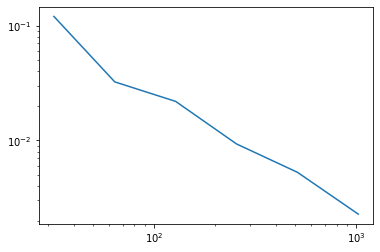

In [0]:
import matplotlib.pyplot as plt

y = []
for i in range (5,11):
  y.append(beta(100,2**i))
x = [2**n for n in range(5,11)]
print(y)
plt.loglog(x,y)

In [0]:
def indi_func(a,sign1,b,sign2,x):       # sign1 and sign 2 mean whether we can take the endpoint respectively
  if (sign1 == 0):                      # 0 means that endpoint is not included
    if (sign2 == 0):
      if (a<x<b):
        f = 1
      else:
        f = 0
    elif (sign2 == 1):                  # 1 means that endpoint is included
      if (a<x<=b):
        f = 1
      else:
        f = 0
  elif (sign1 == 1):
    if (sign2 == 0):
      if (a<=x<b):
        f = 1
      else:
        f = 0
    elif (sign2 == 1):
      if (a<=x<=b):
        f = 1
      else:
        f = 0
  return f                              # Actually, there is no need to discuss whether endpoints are included or not
                                        # Since P(ept) = 0, x is uniform distribution

In [0]:
def mcintegral(N):
  s = 0
  for i in range(N):
    y = np.random.uniform(0,1)
    h = 100 * indi_func(0,0,0.01,1,y) + indi_func(0.01,0,1,0,y)
    s += h 
  return s/N

mcintegral(10000000)

1.9879606

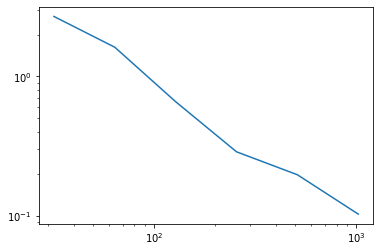

In [0]:
def beta_prime(N,M):
  n = 0
  m = 0
  pi_list = []
  for i in range(N):
    pi_list.append(mcintegral(M))
    n += pi_list[i]
  pi_bar = n/N 
  for i in range(N):
    m += (pi_list[i] - pi_bar)**2
  beta_prime = m/N
  return beta_prime


y = []
for i in range (5,11):
  y.append(beta_prime(100,2**i))
x = [2**n for n in range(5,11)]

plt.loglog(x,y)